In [4]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math 

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

In [5]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [6]:
dataset.shape

(1056, 30)

In [7]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [8]:
x.shape

(1056, 29)

In [9]:
y 

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [11]:
x_train.shape

(844, 29)

In [12]:
x_test.shape

(212, 29)

In [13]:
  #regressor = tree.DecisionTreeRegressor()
  #regressor = linear_model.Ridge(alpha=.5)
regressor = linear_model.Lasso(alpha=0.00001, fit_intercept=True, normalize=False, precompute=False,
    copy_X=True, max_iter=10000, tol=0.1, warm_start=False, positive=False, random_state=0,
    selection='random',)
  #regressor = ElasticNet(random_state=0)
  #regressor = KernelRidge(alpha=1.0)

In [14]:
 regressor.fit(x_train, y_train)

Lasso(alpha=1e-05, max_iter=10000, random_state=0, selection='random', tol=0.1)

In [15]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [16]:
y_pred_train = regressor.predict(x_train)

In [17]:
y_pred_train.shape

(844,)

In [18]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [19]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmse = round(math.sqrt(mse),4)

In [20]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.3014735598717145
MSE is 0.4061
R2 score is 0.368202913103469


In [21]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)
rmseTrain = round(math.sqrt(mseTrain),4)

In [22]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(rmseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.291670676302492
MSE is 0.387
R2 score is 0.3515145799425272


In [23]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [24]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.33369323 0.24185312 0.32123135 0.28236376 0.29232468]
Q2 is 0.2942932275441978


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

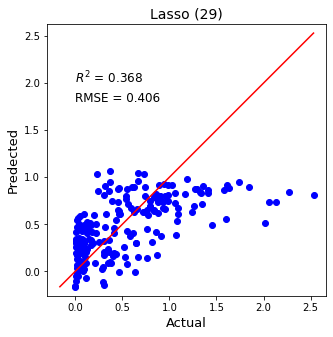

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.368', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.406', fontsize = 12)
plt.title('Lasso (29)', fontsize = 14)
plt.show()

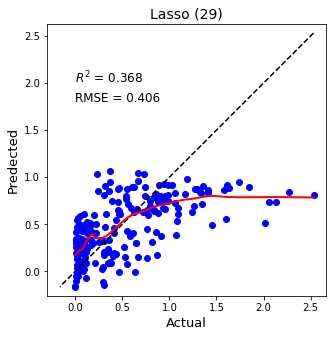

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.368', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.406', fontsize = 12)
plt.title('Lasso (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

In [58]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [188]:
# creatting parameter gride
param_grid_regressor= {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 
                                 1, 1.1, 1.2, 1.3,1.4, 1.5],
                        'selection' : ['cyclic','random'], 
                      'tol': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.7, 0.8, 0.9, 
                                 1, 1.1, 1.2, 1.3,1.4, 1.5]}

In [189]:
regressor_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 10000,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [190]:
regressor_random.fit (x_train, y_train)

C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 800 is smaller than n_iter=10000. Running 800 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 800 candidates, totalling 4000 fits


RandomizedSearchCV(cv=5,
                   estimator=Lasso(alpha=1e-05, max_iter=10000, random_state=0,
                                   tol=0.01),
                   n_iter=10000, n_jobs=-1,
                   param_distributions={'alpha': [1e-06, 1e-05, 0.0001, 0.001,
                                                  0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                  0.6, 0.7, 0.8, 0.9, 1, 1.1,
                                                  1.2, 1.3, 1.4, 1.5],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2,
                                                1.3, 1.4, 1.5]},
                   scoring='neg_mean_squared_error', verbose=2)

In [191]:
regressor_random.best_params_

{'tol': 0.1, 'selection': 'random', 'alpha': 1e-05}

In [192]:
regressor_random.best_score_

-0.16517378518855969

In [229]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [232]:
# creatting parameter gride
param_grid_regressor= {'alpha': [ 0.000001, 0.00001, 0.0001, 0.001,0.1, 0.5,0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3,1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.5, 3, 3.5],
                        'selection' : ['cyclic','random']}

In [233]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=param_grid_regressor,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")

regressor_grid.fit (x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=Lasso(alpha=1e-05, max_iter=10000, random_state=0,
                             selection='random', tol=0.1),
             n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.1, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5,
                                   1.6, 1.7, 1.8, 1.9, 2, 2.5, 3, 3.5],
                         'selection': ['cyclic', 'random']},
             scoring='neg_mean_squared_error', verbose=2)

In [234]:
regressor_grid.best_params_

{'alpha': 1e-05, 'selection': 'random'}

In [235]:
regressor_grid.best_score_

-0.16517378518855969

In [205]:
from matplotlib import pyplot as plt 

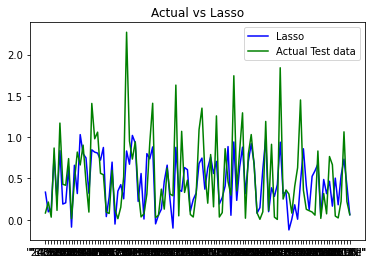

In [228]:
plt.plot(y_pred, label='Lasso', color='b')
plt.plot(y_test, label='Actual Test data', color='g', alpha=1)
plt.title("Actual vs Lasso")
plt.legend()
plt.show()


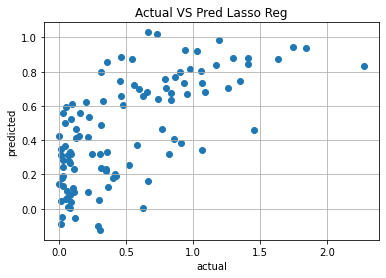

In [227]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title ( 'Actual VS Pred Lasso Reg')
plt.grid(axis = 'y')
plt.grid(axis = 'x')